In [1]:
import numpy as np
import torch
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import os

In [5]:
def read_one_file(file):
    with open(file,"r",encoding = "utf-8") as f:
        reader = csv.reader(f)
        rows = [row[:23] for row in reader]
    values = [float(num) for num in rows[6][1:]] # MOTA MOTP HOTA ...
    return values

def output_one_scene(path, mini, maxi):
    files = os.listdir(path)
    par = []
    metrics = []
    for file in files:
        if file[:4] != "logs":
            continue
        #print(file)
        words = file.split("_")[-1].split(".")
        if mini <= float(words[0]) <= maxi:
            #print(words)
            par.append(float(words[0]))
            values = read_one_file(path+file)
            metrics.append(values)
    par = np.array(par)
    metrics = np.array(metrics)
    idx = np.argsort(par)
    par = par[idx]
    metrics = metrics[idx].T
    return par, metrics

def plt_figure(par, metric, name, baseline):
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    # plt.axes(xscale = "log")
    plt.plot(par, metric, linewidth=3, marker='o', label = "Our")
    base = [baseline for _ in range(len(par))]
    plt.plot(par, base, linewidth=3, marker='*', label = "Base")
    plt.xlabel('NLL threshold \u03C4',fontsize=font_size)# x轴标签
    plt.ylabel(name, fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    # plt.xticks(fontsize=20)
    # plt.yticks(fontsize=20)
    # plt.tight_layout()
    plt.show()
    
def show_all_metrics(path, baseline, mini=500, maxi=3000):
    par, metrics = output_one_scene(path, mini, maxi)
    plt_figure(par, metrics[0], "MOTA", baseline[0])
    plt_figure(par, metrics[1], "MOTP", baseline[1])
    plt_figure(par, metrics[2], "HOTA", baseline[2])

## sort

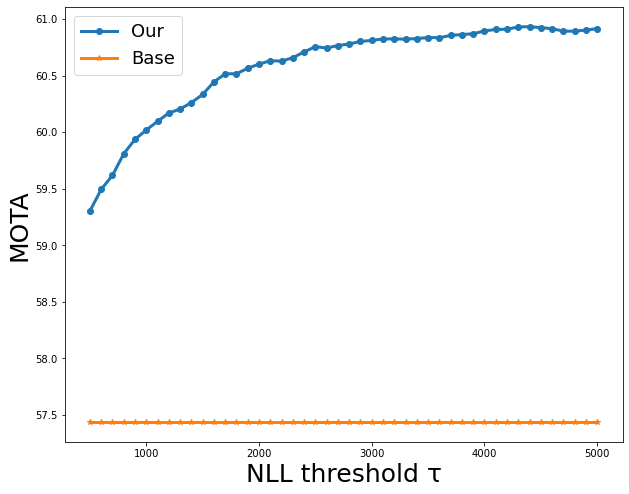

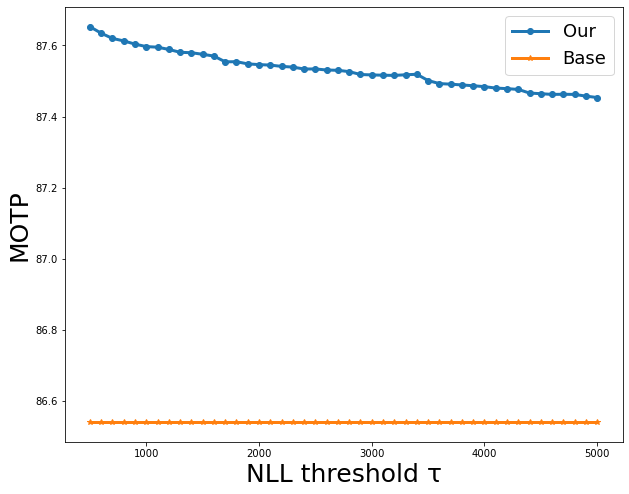

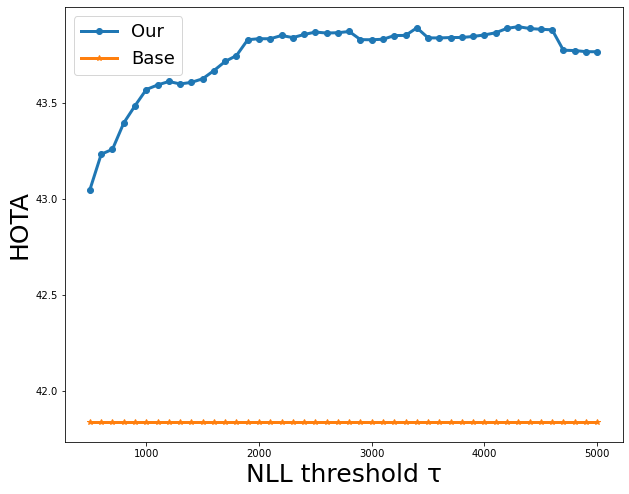

In [10]:
baseline = [57.4366, 86.5414, 41.8382]
path = "logs/sort/nll_compare/upperbound_val_nlla_cp3/"
show_all_metrics(path, baseline, mini=500, maxi=5000)

## ByteTrack

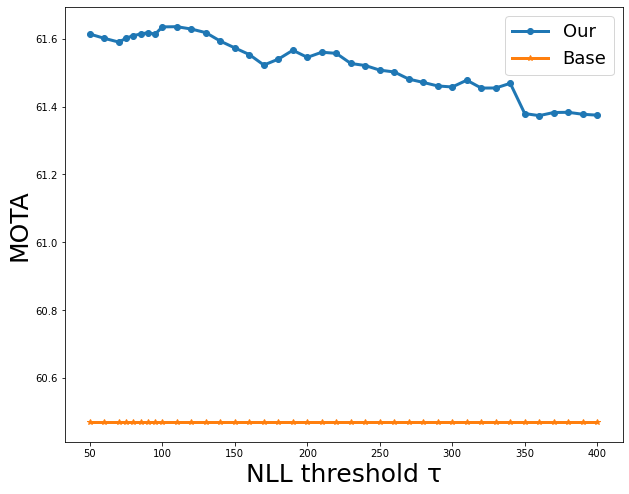

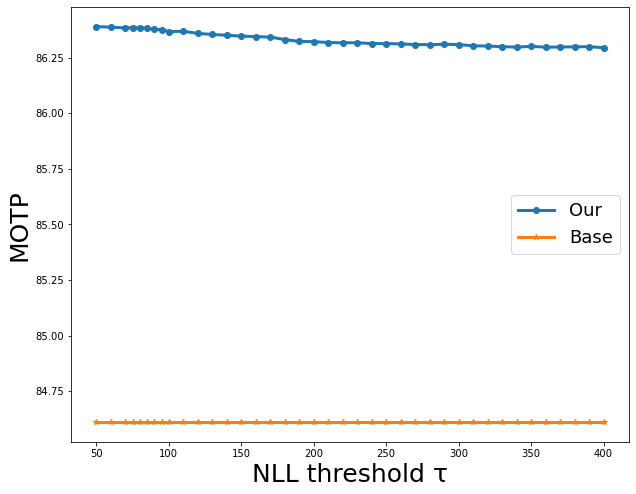

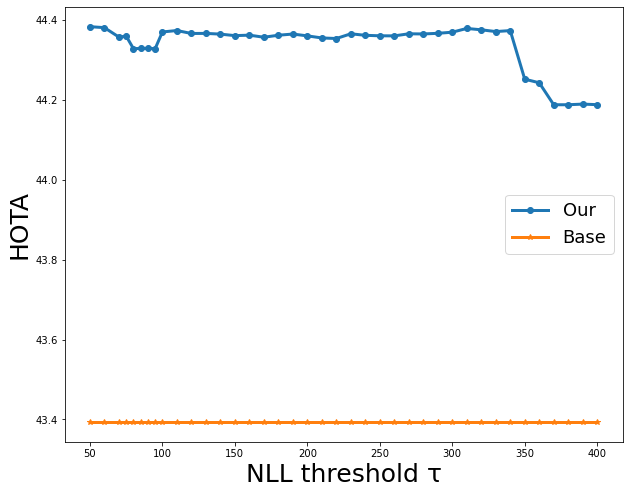

In [12]:
baseline = [60.4708, 84.6114, 43.3936]
path = "logs/byte_tracker/nll_compare/upperbound_val_nlla_cp3/"
show_all_metrics(path, baseline, 50, 400)